# Projeto | Webscrapping
### Manipulação de dados de contratos futuros de Dólar comercial por meio do site oficial da B3.

**Grupo:**
- Lister Ogusuku Ribeiro
- Lorran Caetano Machado Lopes

**Curso:** Engenharia de Computação - Insper | 2024.1

**Prof:** Maciel Calebe
__________

### Análise do site da B3:

Na seção de "Derivativos" dentro do site da B3, temos um resumo estatístico onde a B3 disponibiliza dados de contrato futuro com as negociações da bolsa.
_________


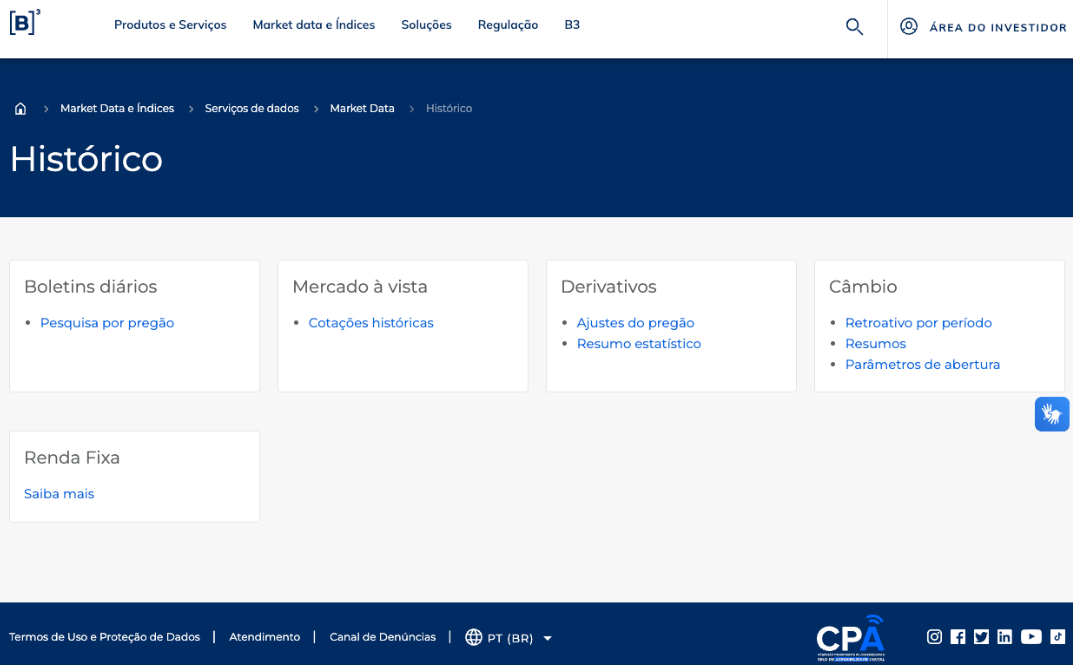

Se filtrarmos uma data qualquer, selecionando o contrato futuro de **Dólar comercial**, temos como retorno uma grande tabela de dados com as informações das negociações de futuro de dólar negociado na data selecionada.

_Também são fornecidas informações dos volumes de dados negociados, porém não é algo que focaremos nesse projeto._
_______


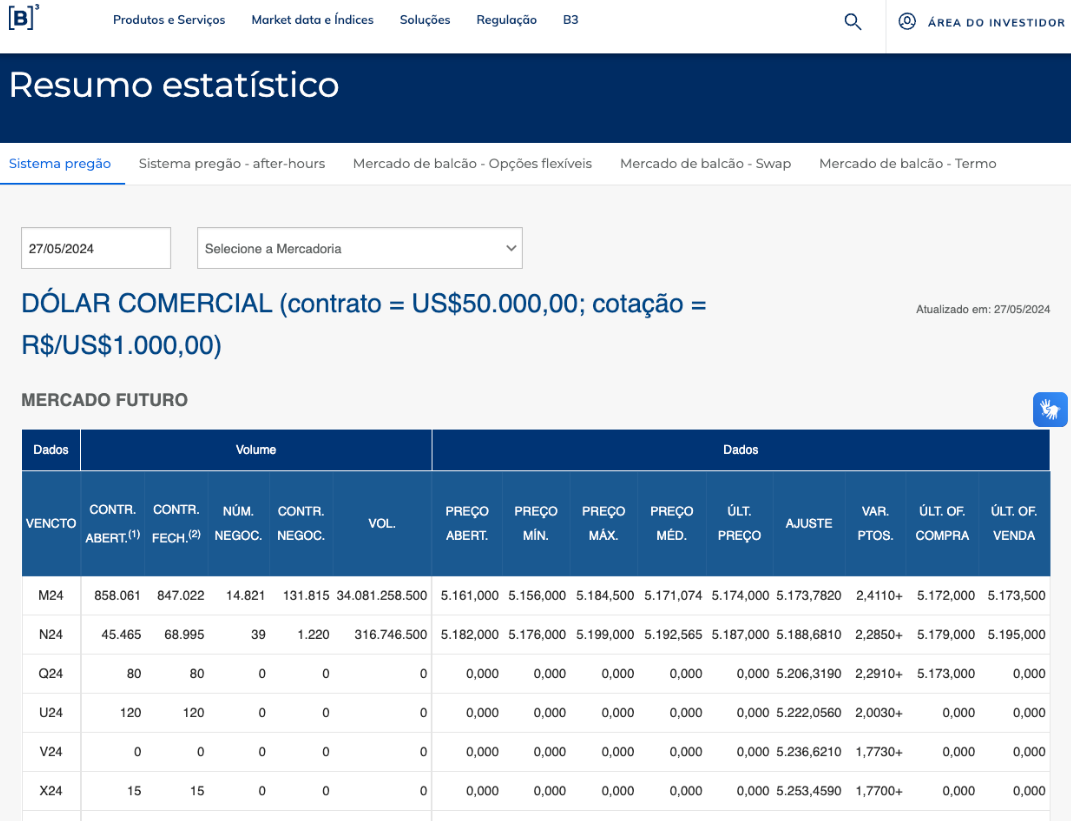

### Manipulando o HTML para entender a captura de informações

Para entendermos como podemos capturar essas informações de forma automatizada, precisaremos manipular o HTML da página por meio do atalho "Inspecionar Elemento"
______
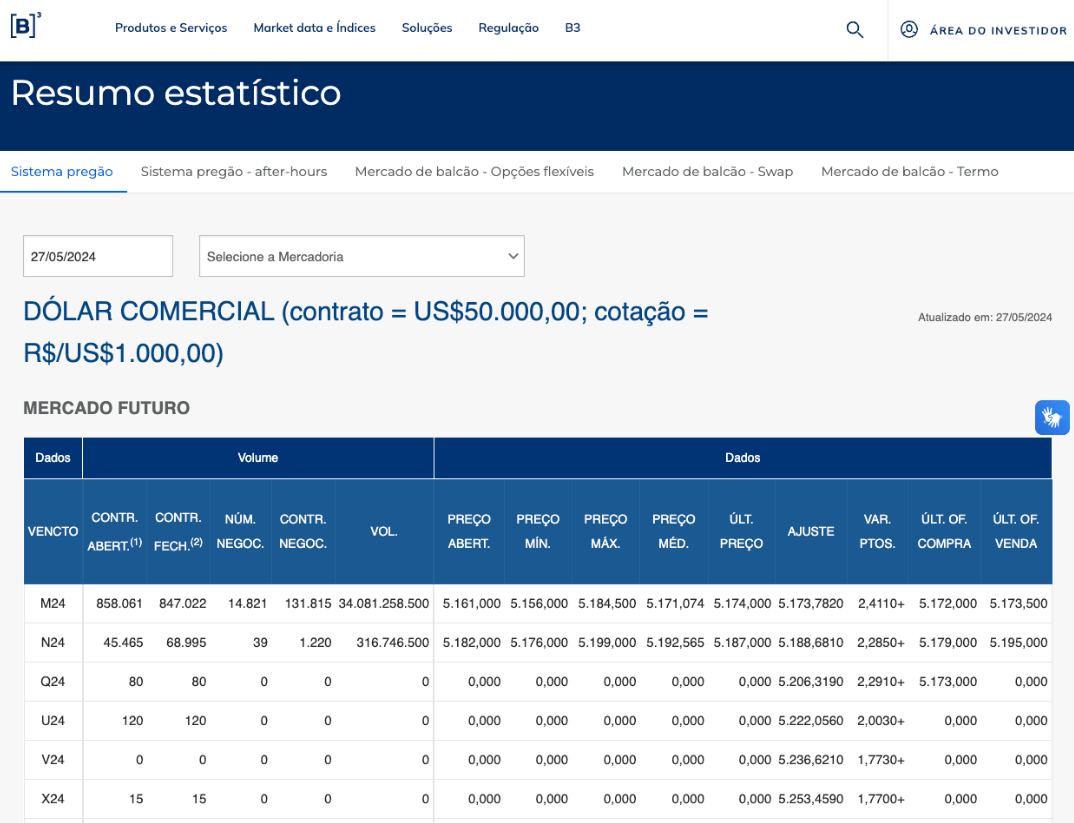

______

Note que, dentro do HTML, conseguimos ver que os dados do futuro pertence a um iframe com uma outra url, a qual iremos acessar.

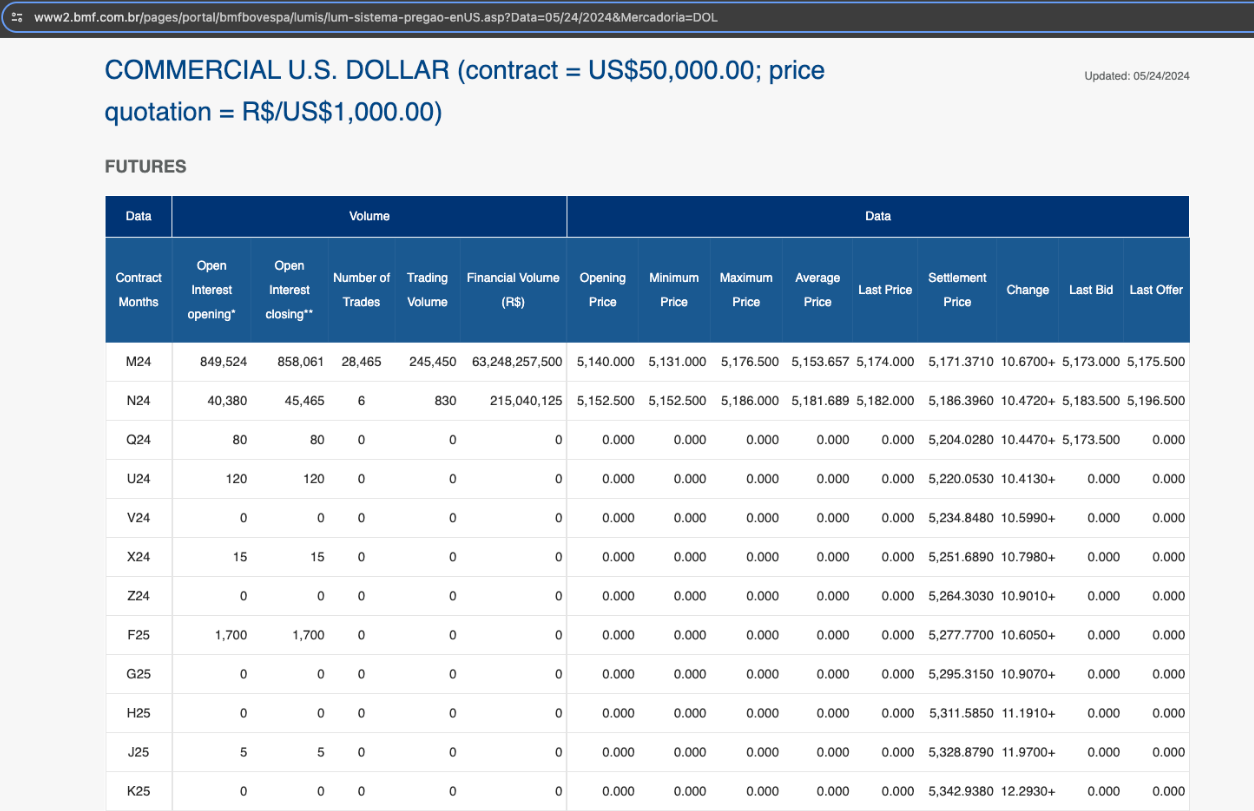

Ao acessar a url, podemos perceber que ela nos leva a uma página que praticamente só possui as informações que desejamos trabalhar.

______
Como estamos interessados nas informações associadas aos contratos futuros, vamos novamente buscar informações dentro do HTML associado à coluna de mercado futuro, que está associada ao vecimento.

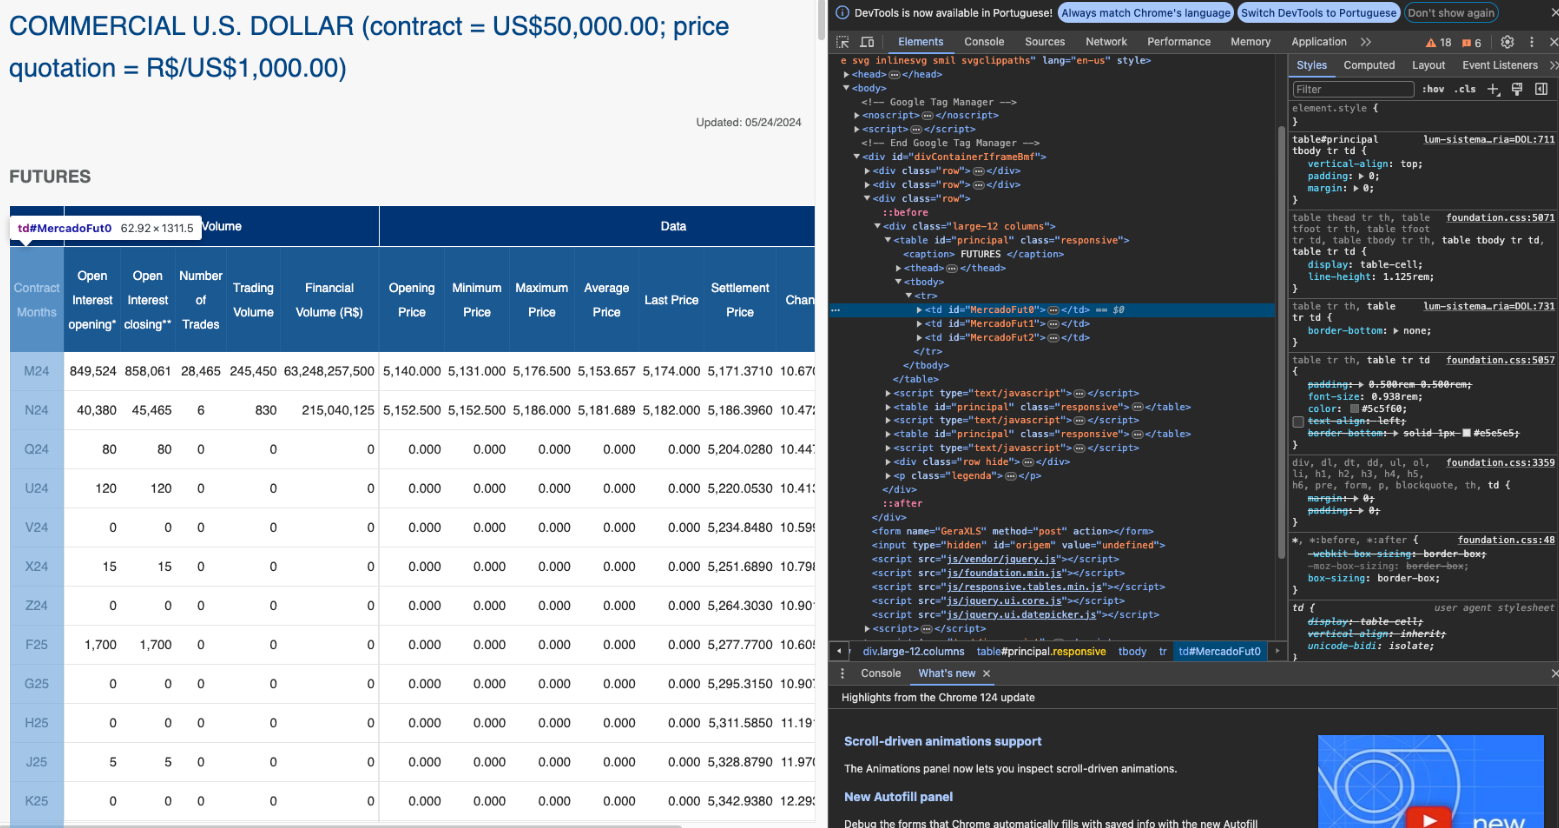

É possível notar que o vecimento está dentro de uma tag "td", cujo id é "MercadoFut0".

______
Já os dados, cujo nosso interesse de manipulação é altíssimo, também podem ser identificados pelo HTML, por meio da tag "MercadoFut2".

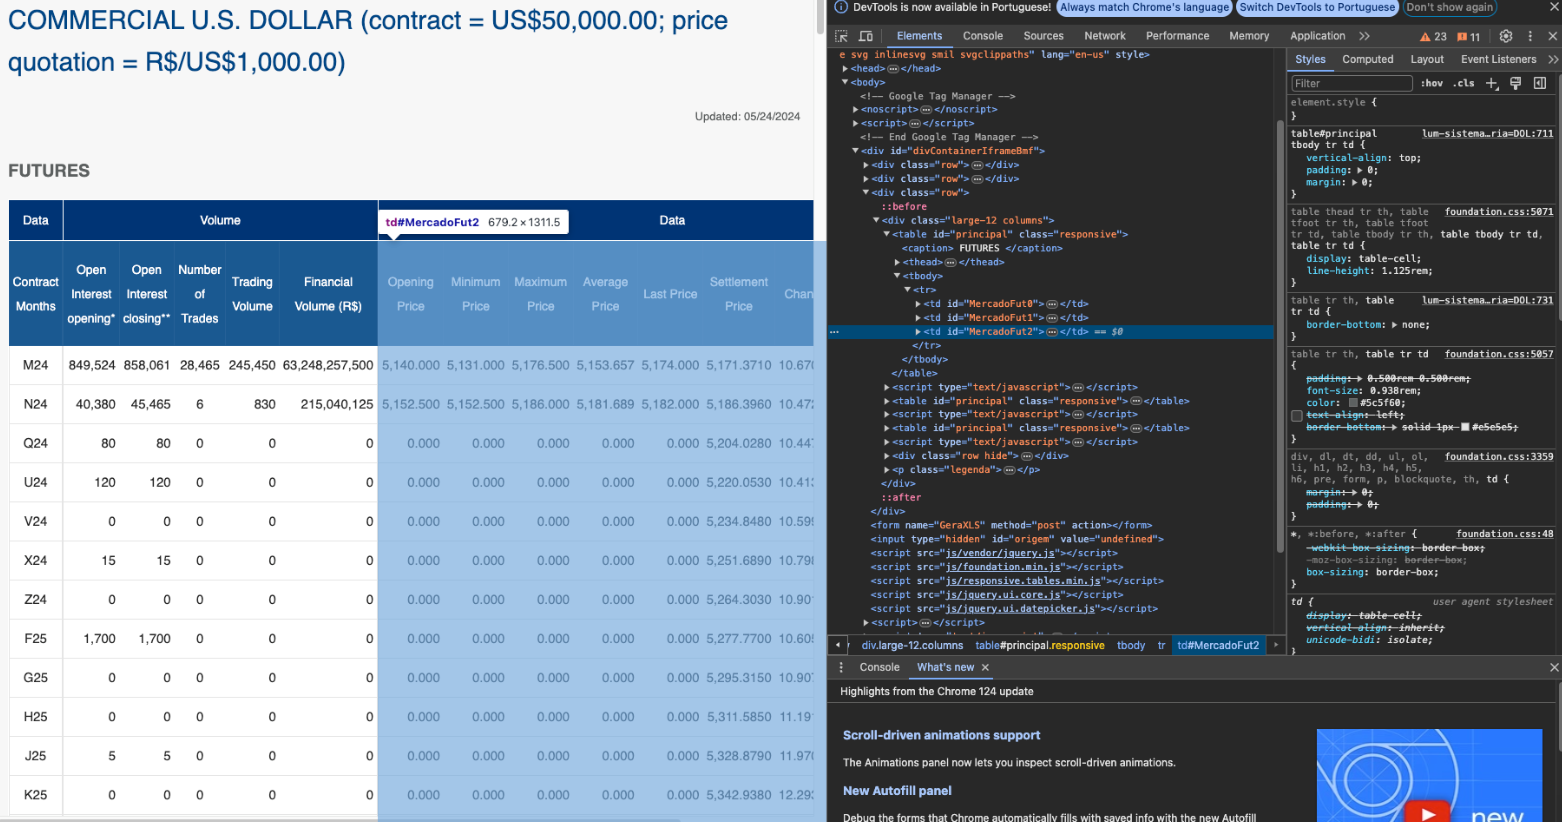
_____
Agora que já entendemos nossa página e já possuímos informações o suficiente para trabalhar, podemos enfim começar a manipulação dos nossos dados por meio do Python.

### Manipulando as informações usando Python

In [ ]:
#Desenvolvido para rodar no Colab
!pip install selenium
!pip install webdriver_manager

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
!sudo apt update
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get -f install
!google-chrome-stable --version

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,858 kB]
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy/main amd64 Packages [47.6 kB]
Get:13 http://archive.ubunt

In [ ]:
# Bibliotecas
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip show webdriver_manager

Name: webdriver-manager
Version: 4.0.1
Summary: Library provides the way to automatically manage drivers for different browsers
Home-page: https://github.com/SergeyPirogov/webdriver_manager
Author: Sergey Pirogov
Author-email: automationremarks@gmail.com
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: packaging, python-dotenv, requests
Required-by: 


In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
driver.set_page_load_timeout(60)

In [ ]:
# Acessar página da B3 a partir de uma data específica
data="02/02/2023" #Aqui o usuário/gestor pode colocar a data que deseja
URL_DOL = "https://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-sistema-pregao-enUS.asp?Data="+ data +"&Mercadoria=DOL"
driver.get(URL_DOL)

In [ ]:
# Capturando a coluna de vencimento do futuro de dólar

vencimento = driver.find_element(By.ID, "MercadoFut0").text
vencimento

'Contract Months\nH23\nJ23\nK23\nM23\nN23\nQ23\nU23\nV23\nX23\nZ23\nF24\nG24\nJ24\nN24\nV24\nF25\nJ25\nN25\nV25\nF26'

In [ ]:
# Tratando dados de vencimento

vencimento=vencimento.split()
vencimento

['Contract',
 'Months',
 'H23',
 'J23',
 'K23',
 'M23',
 'N23',
 'Q23',
 'U23',
 'V23',
 'X23',
 'Z23',
 'F24',
 'G24',
 'J24',
 'N24',
 'V24',
 'F25',
 'J25',
 'N25',
 'V25',
 'F26']

In [ ]:
vencimento = vencimento[2:]
vencimento

['H23',
 'J23',
 'K23',
 'M23',
 'N23',
 'Q23',
 'U23',
 'V23',
 'X23',
 'Z23',
 'F24',
 'G24',
 'J24',
 'N24',
 'V24',
 'F25',
 'J25',
 'N25',
 'V25',
 'F26']

In [ ]:
tabela_vencimento = pd.DataFrame(vencimento, columns=["VENCTO"])
tabela_vencimento

,VENCTO
0,H23
1,J23
2,K23
3,M23
4,N23
5,Q23
6,U23
7,V23
8,X23
9,Z23


In [ ]:
n_linhas = tabela_vencimento.shape[0]
n_linhas

20

In [ ]:
# Captura dos dados do futuro de dólar

dados = driver.find_element(By.ID, "MercadoFut2").text
dados

'Opening Price Minimum Price Maximum Price Average Price Last Price Settlement Price Change Last Bid Last Offer\n5,050.000 4,963.500 5,078.500 5,026.117 5,072.500 5,056.5720 55.9780- 5,072.000 5,075.000\n5,100.000 5,100.000 5,100.000 5,100.000 5,100.000 5,089.7880 56.2730- 5,085.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,112.6420 56.7030- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,145.3630 57.0750- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,175.7530 57.3620- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,205.5720 57.1850- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,240.5020 57.0370- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,267.3510 57.3430- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,297.4430 56.6620- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,324.4890 56.0030- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,349.5000 55.6320- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,384.0880 53.5680- 0.000 0.000\n0.000 0.000 0.000 0.000 0.000 5,440.7330 52.4590- 0.000 0.000\n0.000 0.000 0.00

In [ ]:
dados = dados.split()
dados

['Opening',
 'Price',
 'Minimum',
 'Price',
 'Maximum',
 'Price',
 'Average',
 'Price',
 'Last',
 'Price',
 'Settlement',
 'Price',
 'Change',
 'Last',
 'Bid',
 'Last',
 'Offer',
 '5,050.000',
 '4,963.500',
 '5,078.500',
 '5,026.117',
 '5,072.500',
 '5,056.5720',
 '55.9780-',
 '5,072.000',
 '5,075.000',
 '5,100.000',
 '5,100.000',
 '5,100.000',
 '5,100.000',
 '5,100.000',
 '5,089.7880',
 '56.2730-',
 '5,085.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,112.6420',
 '56.7030-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,145.3630',
 '57.0750-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,175.7530',
 '57.3620-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,205.5720',
 '57.1850-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,240.5020',
 '57.0370-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,267.3510',
 '57.3430-',
 '0.0

In [ ]:
dados = dados[17:]
dados

['5,050.000',
 '4,963.500',
 '5,078.500',
 '5,026.117',
 '5,072.500',
 '5,056.5720',
 '55.9780-',
 '5,072.000',
 '5,075.000',
 '5,100.000',
 '5,100.000',
 '5,100.000',
 '5,100.000',
 '5,100.000',
 '5,089.7880',
 '56.2730-',
 '5,085.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,112.6420',
 '56.7030-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,145.3630',
 '57.0750-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,175.7530',
 '57.3620-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,205.5720',
 '57.1850-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,240.5020',
 '57.0370-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,267.3510',
 '57.3430-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,297.4430',
 '56.6620-',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '0.000',
 '5,324.4890',
 

In [ ]:
dados = np.array_split(dados, n_linhas)
dados #separamos em vários arrays e cada array é uma linha
#precisamos agora transofrmar os dados em uma tabela

[array(['5,050.000', '4,963.500', '5,078.500', '5,026.117', '5,072.500',
        '5,056.5720', '55.9780-', '5,072.000', '5,075.000'], dtype='<U10'),
 array(['5,100.000', '5,100.000', '5,100.000', '5,100.000', '5,100.000',
        '5,089.7880', '56.2730-', '5,085.000', '0.000'], dtype='<U10'),
 array(['0.000', '0.000', '0.000', '0.000', '0.000', '5,112.6420',
        '56.7030-', '0.000', '0.000'], dtype='<U10'),
 array(['0.000', '0.000', '0.000', '0.000', '0.000', '5,145.3630',
        '57.0750-', '0.000', '0.000'], dtype='<U10'),
 array(['0.000', '0.000', '0.000', '0.000', '0.000', '5,175.7530',
        '57.3620-', '0.000', '0.000'], dtype='<U10'),
 array(['0.000', '0.000', '0.000', '0.000', '0.000', '5,205.5720',
        '57.1850-', '0.000', '0.000'], dtype='<U10'),
 array(['0.000', '0.000', '0.000', '0.000', '0.000', '5,240.5020',
        '57.0370-', '0.000', '0.000'], dtype='<U10'),
 array(['0.000', '0.000', '0.000', '0.000', '0.000', '5,267.3510',
        '57.3430-', '0.000', '0.00

In [ ]:
tabela_dados = pd.DataFrame(dados, columns=["PREÇO ABERT.", "PREÇO MÍN.","PREÇO MÁX.","PREÇO MÉD.","ÚLT. PREÇO","AJUSTE","VAR. PTOS","ÚLT. OF. COMPRA","ÚLT. OF. VENDA"])
tabela_dados

,PREÇO ABERT.,PREÇO MÍN.,PREÇO MÁX.,PREÇO MÉD.,ÚLT. PREÇO,AJUSTE,VAR. PTOS,ÚLT. OF. COMPRA,ÚLT. OF. VENDA
0,"5,050.000","4,963.500","5,078.500","5,026.117","5,072.500","5,056.5720",55.9780-,"5,072.000","5,075.000"
1,"5,100.000","5,100.000","5,100.000","5,100.000","5,100.000","5,089.7880",56.2730-,"5,085.000",0.000
2,0.000,0.000,0.000,0.000,0.000,"5,112.6420",56.7030-,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,"5,145.3630",57.0750-,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,"5,175.7530",57.3620-,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,"5,205.5720",57.1850-,0.000,0.000
6,0.000,0.000,0.000,0.000,0.000,"5,240.5020",57.0370-,0.000,0.000
7,0.000,0.000,0.000,0.000,0.000,"5,267.3510",57.3430-,0.000,0.000
8,0.000,0.000,0.000,0.000,0.000,"5,297.4430",56.6620-,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,"5,324.4890",56.0030-,0.000,0.000


In [ ]:
# Consolidação de dados em uma tabela
df_dol = pd.merge(tabela_vencimento, tabela_dados, left_index=True, right_index=True, how="inner")
df_dol
# Agora temos os dados de vecimento junto com os dados negociados do futuro de dólar da data
# específica que passamos, tal qual fornecido pela B3
#Assim sendo, ao invés de termos que ficar copiando e colando os dados (num Excel, por exemplo), temos aqui uma
# maneira automatizada de consultar os dados de contrato futuro de dólar

,VENCTO,PREÇO ABERT.,PREÇO MÍN.,PREÇO MÁX.,PREÇO MÉD.,ÚLT. PREÇO,AJUSTE,VAR. PTOS,ÚLT. OF. COMPRA,ÚLT. OF. VENDA
0,H23,"5,050.000","4,963.500","5,078.500","5,026.117","5,072.500","5,056.5720",55.9780-,"5,072.000","5,075.000"
1,J23,"5,100.000","5,100.000","5,100.000","5,100.000","5,100.000","5,089.7880",56.2730-,"5,085.000",0.000
2,K23,0.000,0.000,0.000,0.000,0.000,"5,112.6420",56.7030-,0.000,0.000
3,M23,0.000,0.000,0.000,0.000,0.000,"5,145.3630",57.0750-,0.000,0.000
4,N23,0.000,0.000,0.000,0.000,0.000,"5,175.7530",57.3620-,0.000,0.000
5,Q23,0.000,0.000,0.000,0.000,0.000,"5,205.5720",57.1850-,0.000,0.000
6,U23,0.000,0.000,0.000,0.000,0.000,"5,240.5020",57.0370-,0.000,0.000
7,V23,0.000,0.000,0.000,0.000,0.000,"5,267.3510",57.3430-,0.000,0.000
8,X23,0.000,0.000,0.000,0.000,0.000,"5,297.4430",56.6620-,0.000,0.000
9,Z23,0.000,0.000,0.000,0.000,0.000,"5,324.4890",56.0030-,0.000,0.000


_______
Por meio da manipulação acima, conseguimos obter os dados de vencimento junto aos dados de futuro de dólar negociados na data específica inputada pelo usuário. Assim sendo, ao invés de termos que ficar copiando e colando todas as informações, por exemplo, em uma tabela do Excel, agora temos uma forma automatizada de coletar, manipular e consultar todos os dados de contratos futuros de dólar.

_______
## Generalizando o código
Agora, para tornar o projeto mais abranjente e robusto, vamos extrair todos os dados do ano de 2023.
Faremos isso da seguinte maneira:
- obtenção de todos os dias com cotação no ano de 2023
- criação de uma tabela DF para cada dia
- salvar cada tabela DF em uma aba de um arquivo .xlxs

Ao final, teremos um arquivo .xlxs com todos os dados do ano de 2023 para o nosso problema inicial.

In [ ]:
from datetime import date, timedelta

# Definindo o ano para o qual o código será gerado
year = 2023

# Feriados em 2023
holidays = [
    "01/01/2023", "20/02/2023", "21/02/2023", "22/02/2023", "07/04/2023",
    "21/04/2023", "01/05/2023", "08/06/2023", "07/09/2023", "12/10/2023",
    "02/11/2023", "15/11/2023", "25/12/2023", "29/12/2023"
]

# Convertendo strings de feriados para objetos date
holidays = [date.fromisoformat(f"{day[-4:]}-{day[3:5]}-{day[0:2]}") for day in holidays]

# Gerar todas as datas do ano, excluindo sábados, domingos e feriados
start_date = date(year, 1, 1)
end_date = date(year, 12, 31)
all_dates = []

current_date = start_date
while current_date <= end_date:
    if current_date.weekday() < 5 and current_date not in holidays:  # 0-4 são dias da semana (Seg-Sex)
        all_dates.append(current_date.strftime("%d/%m/%Y"))
    current_date += timedelta(days=1)


In [ ]:
# Criando um objeto ExcelWriter
with pd.ExcelWriter('dados_dol_2023_por_dia.xlsx', engine='openpyxl') as writer:
    for data in all_dates:
        print(data)
        URL_DOL = f"https://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-sistema-pregao-ptBR.asp?Data={data}&Mercadoria=DOL"
        driver.get(URL_DOL)

        vencimento = driver.find_element(By.ID, "MercadoFut0").text.split("\n")[1:]
        tabela_vencimento = pd.DataFrame(vencimento, columns=["VENCTO"])
        n_linhas = tabela_vencimento.shape[0]

        dados = driver.find_element(By.ID, "MercadoFut2").text.split()[19:]
        dados = np.array_split(dados, n_linhas)
        tabela_dados = pd.DataFrame(dados, columns=["PREÇO ABERT", "PREÇO MÍN.", "PREÇO MÁX.", "PREÇO MÉD.", "ÚLT. PREÇO", "AJUSTE", "VAR. PTOS.", "ÚLT. OF. COMPRA", "ÚLT. OF. VENDA"])

        # Tratamento de dados
        for coluna in tabela_dados.columns:
            if coluna != 'VAR. PTOS.':
                # Trata os valores monetários, convertendo para o formato desejado
                tabela_dados[coluna] = tabela_dados[coluna].str.replace(',', '').str.replace('.', '').astype(str).str.slice(0, 1) + '.' + tabela_dados[coluna].str.replace(',', '').str.replace('.', '').astype(str).str.slice(1,)
                tabela_dados[coluna] = tabela_dados[coluna].astype(float)
            else:
                # Trata a coluna 'VAR. PTOS.' convertendo valores e ajustando sinais
                tabela_dados[coluna] = tabela_dados[coluna].apply(lambda x: float(x.replace(',', '.').rstrip('+')) if '+' in x else -float(x.replace(',', '.').rstrip('-')))

        df_dol = pd.merge(tabela_vencimento, tabela_dados, left_index=True, right_index=True, how="inner")

        # Salvando o DataFrame na aba correspondente à data
        df_dol.to_excel(writer, sheet_name=data.replace('/','_'), index=False)

driver.quit()

print("Dados salvos com sucesso em abas separadas por data!")

02/01/2023
03/01/2023
04/01/2023
05/01/2023
06/01/2023
09/01/2023
10/01/2023
11/01/2023
12/01/2023
13/01/2023
16/01/2023
17/01/2023
18/01/2023
19/01/2023
20/01/2023
23/01/2023
24/01/2023
25/01/2023
26/01/2023
27/01/2023
30/01/2023
31/01/2023
01/02/2023
02/02/2023
03/02/2023
06/02/2023
07/02/2023
08/02/2023
09/02/2023
10/02/2023
13/02/2023
14/02/2023
15/02/2023
16/02/2023
17/02/2023
23/02/2023
24/02/2023
27/02/2023
28/02/2023
01/03/2023
02/03/2023
03/03/2023
06/03/2023
07/03/2023
08/03/2023
09/03/2023
10/03/2023
13/03/2023
14/03/2023
15/03/2023
16/03/2023
17/03/2023
20/03/2023
21/03/2023
22/03/2023
23/03/2023
24/03/2023
27/03/2023
28/03/2023
29/03/2023
30/03/2023
31/03/2023
03/04/2023
04/04/2023
05/04/2023
06/04/2023
10/04/2023
11/04/2023
12/04/2023
13/04/2023
14/04/2023
17/04/2023
18/04/2023
19/04/2023
20/04/2023
24/04/2023
25/04/2023
26/04/2023
27/04/2023
28/04/2023
02/05/2023
03/05/2023
04/05/2023
05/05/2023
08/05/2023
09/05/2023
10/05/2023
11/05/2023
12/05/2023
15/05/2023
16/05/2023

_______
Vamos visualizar o arquivo para ver se deu tudo certo:

In [ ]:
# Carregar a planilha
file_path = 'dados_dol_2023_por_dia.xlsx'
xls = pd.read_excel(file_path, sheet_name='02_01_2023', engine='openpyxl')

# Exibindo as primeiras linhas do DataFrame
print("Primeiras linhas dos dados carregados:")
print(xls.head())

# Exibindo informações básicas sobre o DataFrame
print("\nInformações do DataFrame:")
print(xls.info())

Primeiras linhas dos dados carregados:
  VENCTO  PREÇO ABERT  PREÇO MÍN.  PREÇO MÁX.  PREÇO MÉD.  ÚLT. PREÇO  \
0    F23        0.000       0.000         0.0    0.000000         0.0   
1    G23        5.323       5.321         5.4    5.380172         5.4   
2    H23        0.000       0.000         0.0    0.000000         0.0   
3    J23        0.000       0.000         0.0    0.000000         0.0   
4    K23        0.000       0.000         0.0    0.000000         0.0   

     AJUSTE  VAR. PTOS.  ÚLT. OF. COMPRA  ÚLT. OF. VENDA  
0  5.217700       0.000            0.000           0.000  
1  5.390280      66.312            5.399           5.400  
2  5.416326      66.957            5.406           5.454  
3  5.451615      67.263            0.000           0.000  
4  5.476124      67.705            0.000           0.000  

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column           Non-Null Count  

______
Para entendimento das siglas das linhas para analisar os dados, utilizamos a seguinte tabela:
https://ajuda.modalmais.com.br/hc/article_attachments/1500004470702/4.JPG

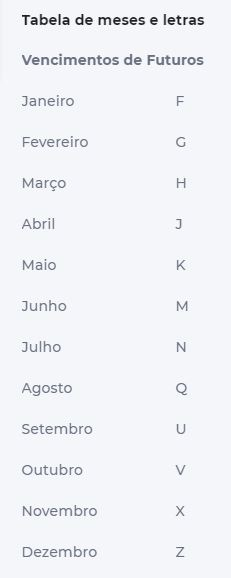

### Metodologia
- Carregamento dos Dados: Utilizamos o arquivo Excel contendo cotações para cada dia útil de 2023.
- Organização Mensal: Agrupamos os dados por mês e vencimento para facilitar a análise.
- Visualização: Utilizamos a biblioteca seaborn para criar gráficos de evolução diária dos preços médios, tanto mensais quanto anuais.
- Ajustes nos Gráficos: Melhoramos a legibilidade dos gráficos ajustando os rótulos do eixo X para mostrar apenas dias úteis selecionados.

In [ ]:
# Carregar o arquivo Excel
file_path = 'dados_dol_2023_por_dia.xlsx'
xls = pd.ExcelFile(file_path)

# Dicionário para armazenar DataFrames mensais
monthly_dfs = {
    'janeiro': [],
    'fevereiro': [],
    'março': [],
    'abril': [],
    'maio': [],
    'junho': [],
    'julho': [],
    'agosto': [],
    'setembro': [],
    'outubro': [],
    'novembro': [],
    'dezembro': []
}

# Mapeamento de meses e vencimentos
months_map = {
    '01': 'janeiro',
    '02': 'fevereiro',
    '03': 'março',
    '04': 'abril',
    '05': 'maio',
    '06': 'junho',
    '07': 'julho',
    '08': 'agosto',
    '09': 'setembro',
    '10': 'outubro',
    '11': 'novembro',
    '12': 'dezembro'
}

vencimentos_map = {
    'janeiro': 'G23',
    'fevereiro': 'H23',
    'março': 'J23',
    'abril': 'K23',
    'maio': 'M23',
    'junho': 'N23',
    'julho': 'Q23',
    'agosto': 'U23',
    'setembro': 'V23',
    'outubro': 'X23',
    'novembro': 'Z23',
    'dezembro': 'F24'
}

# Iterar sobre as abas (dias) e extrair dados relevantes
for sheet in xls.sheet_names:
    df = pd.read_excel(xls, sheet_name=sheet)
    month = months_map[sheet[3:5]]
    vencimento = vencimentos_map[month]

    # Filtrar as linhas do vencimento relevante
    relevant_rows = df[df['VENCTO'] == vencimento]
    monthly_dfs[month].append(relevant_rows)

# Concatenar as listas de DataFrames em um único DataFrame por mês
for month in monthly_dfs:
    monthly_dfs[month] = pd.concat(monthly_dfs[month], ignore_index=True)

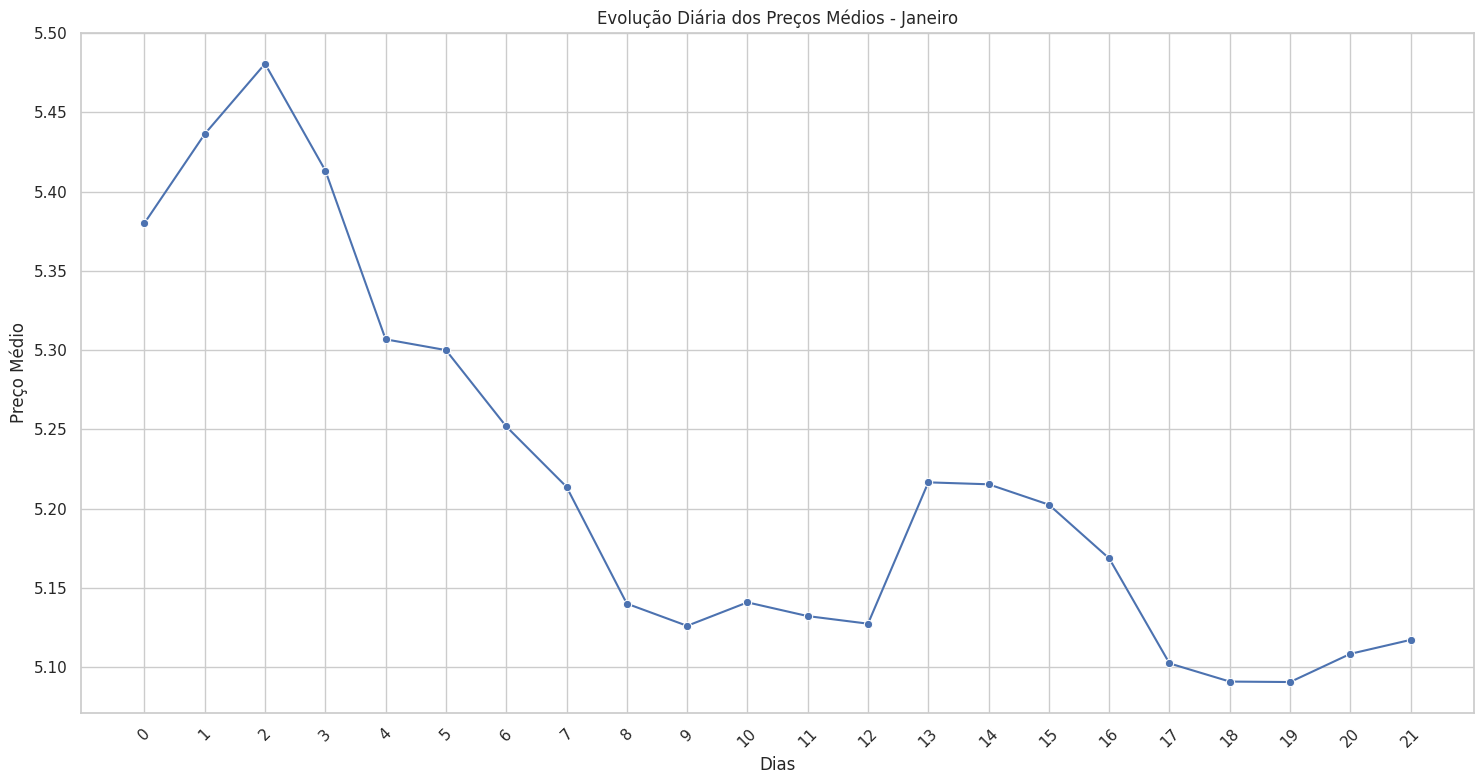

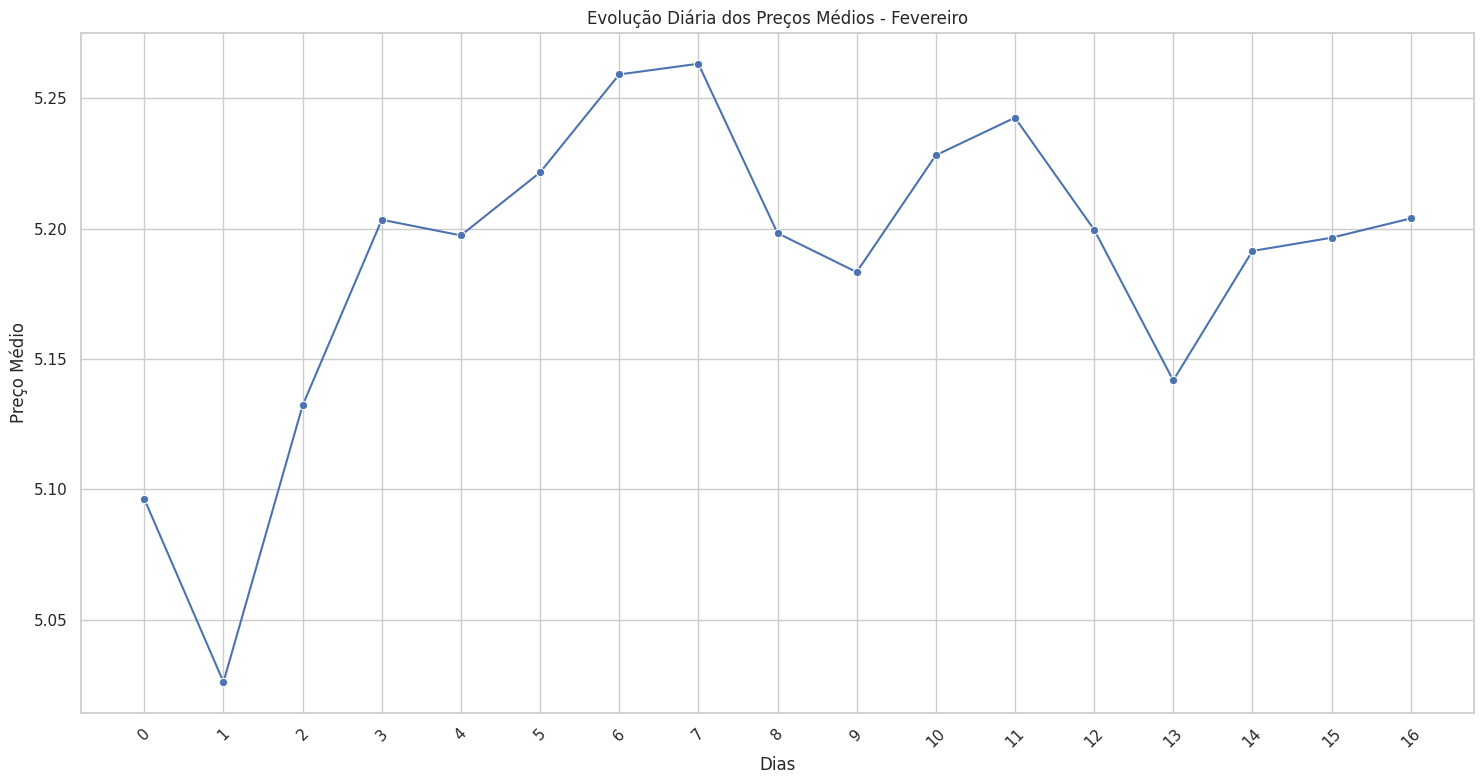

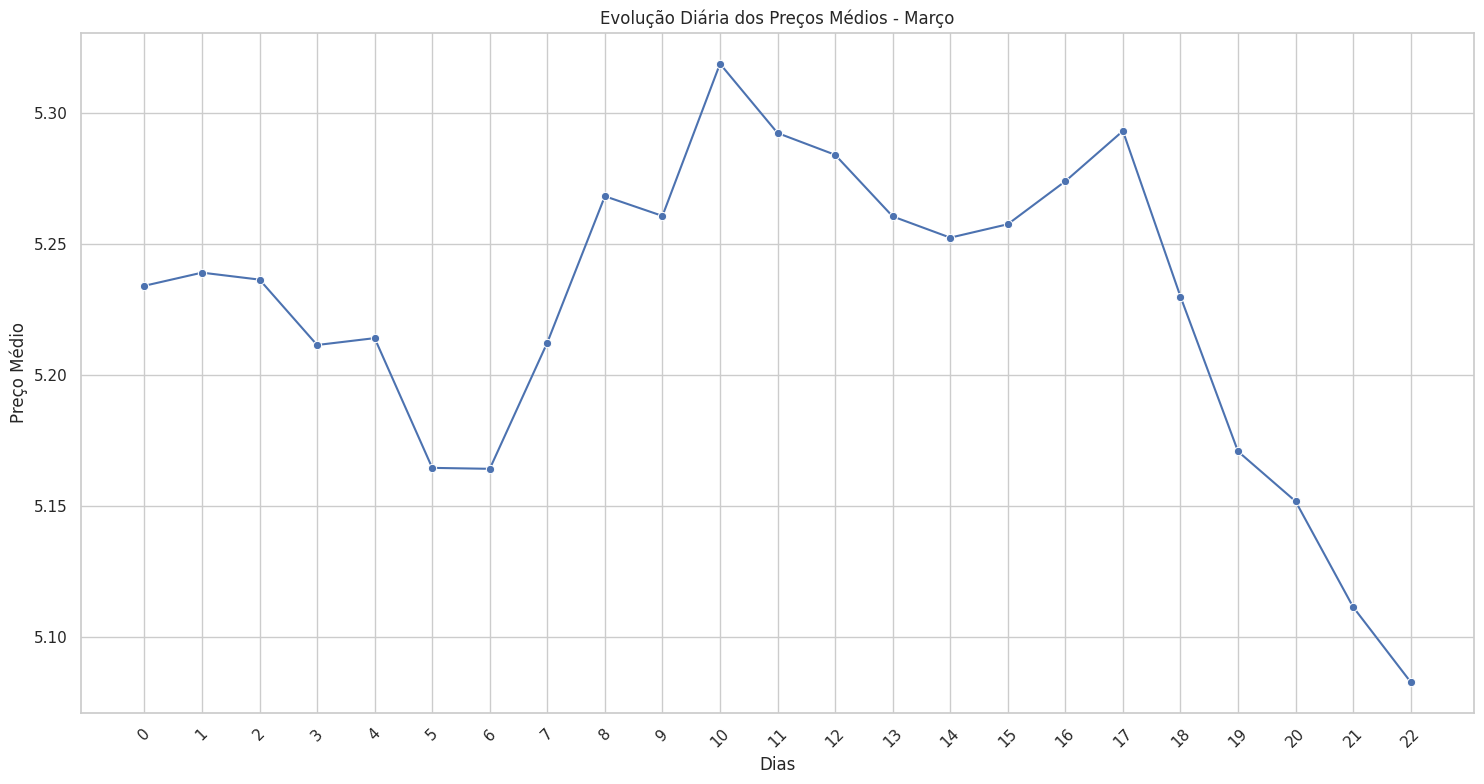

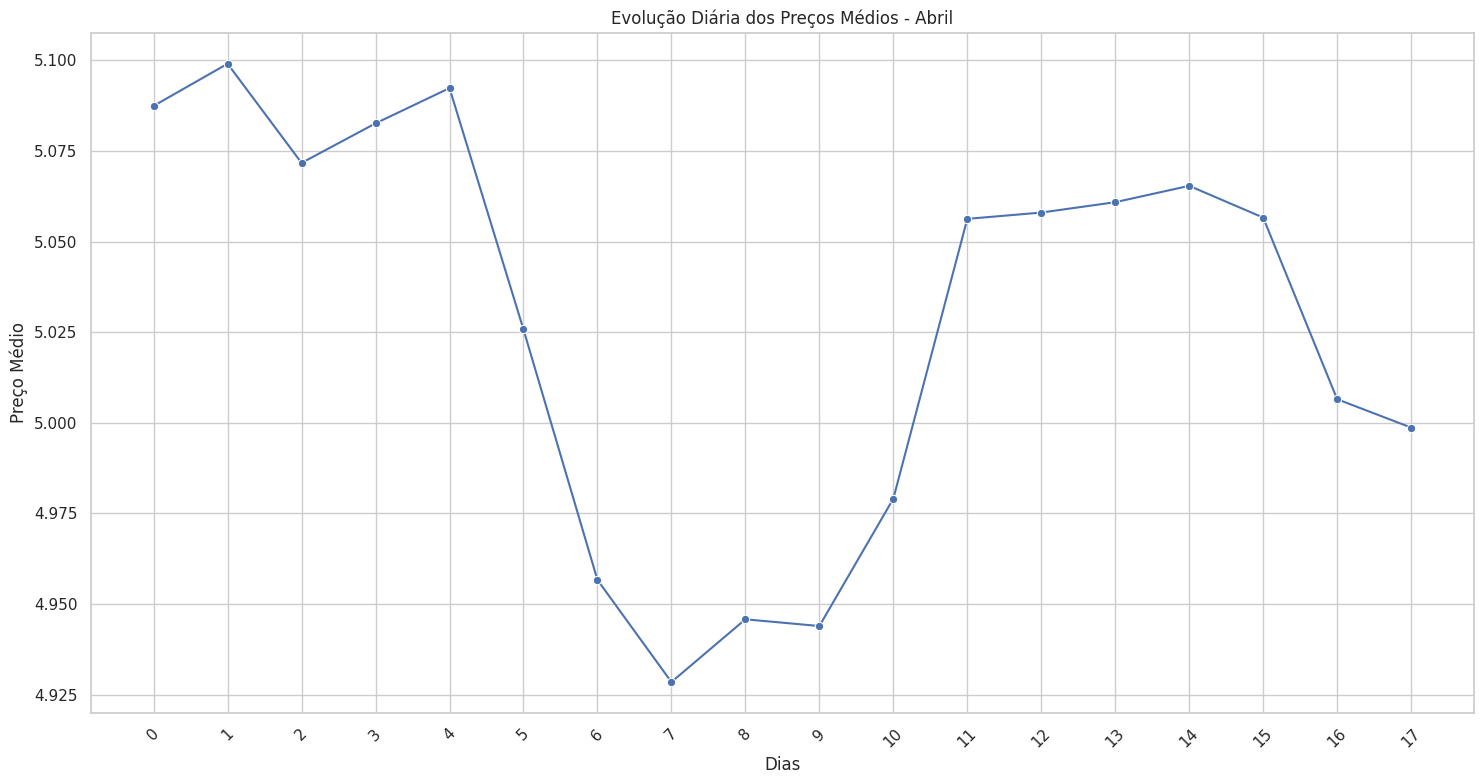

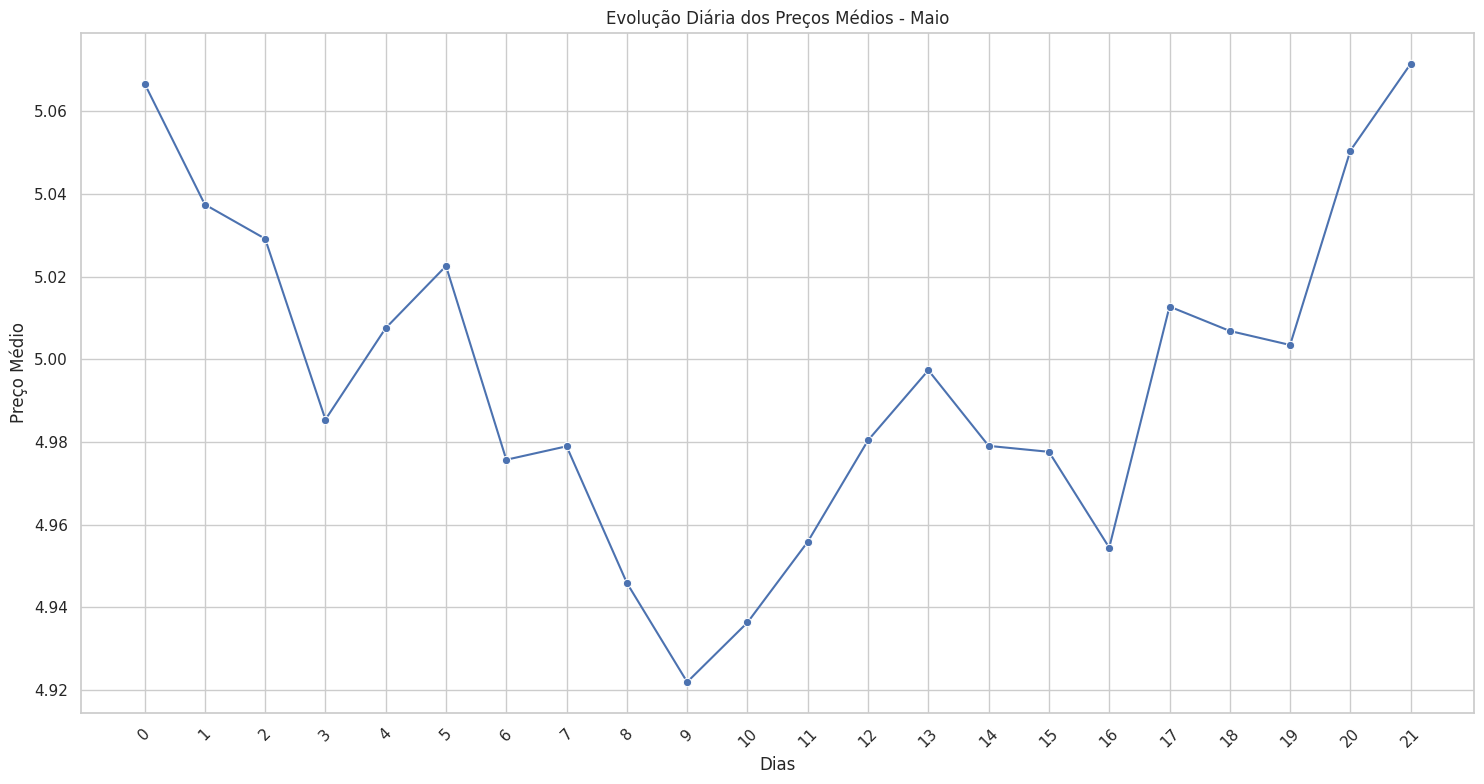

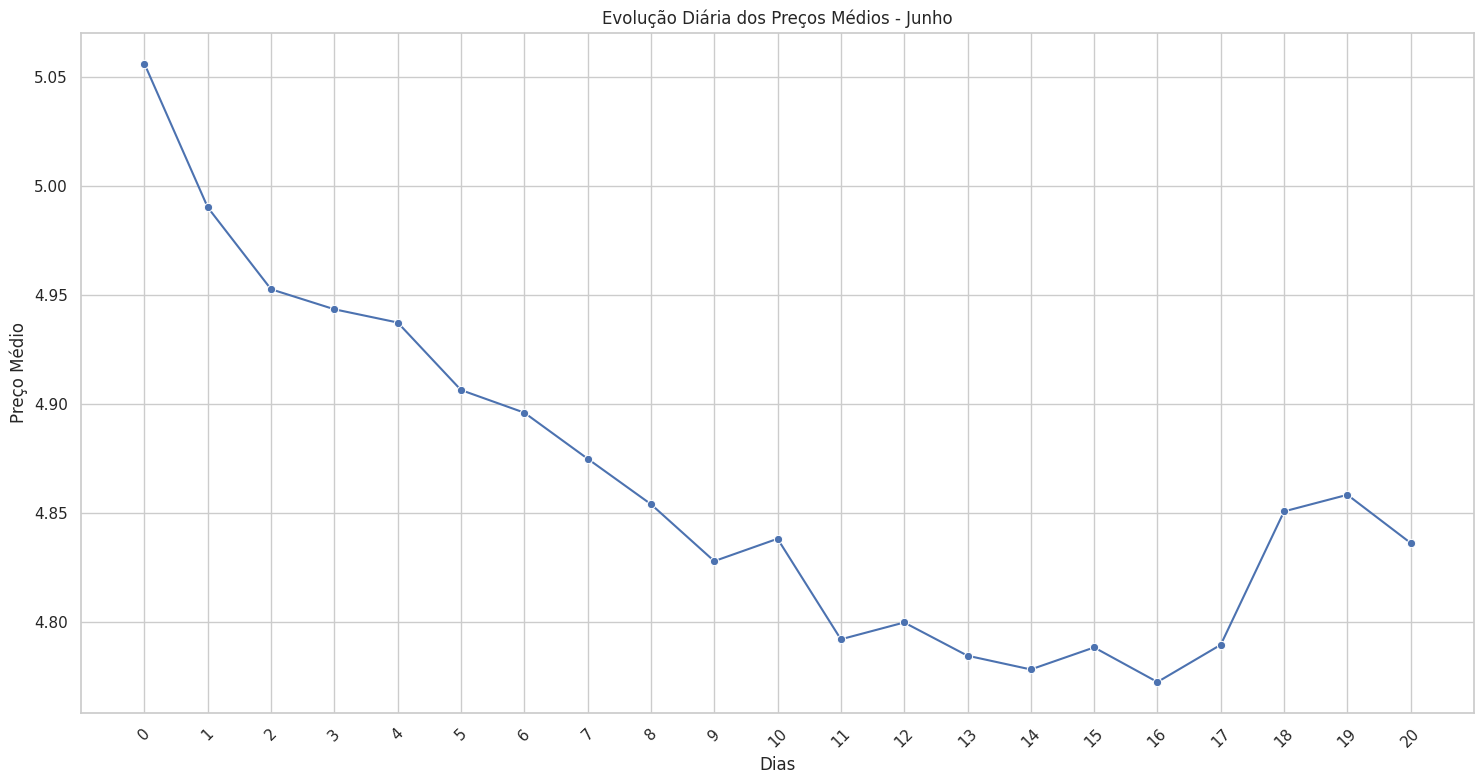

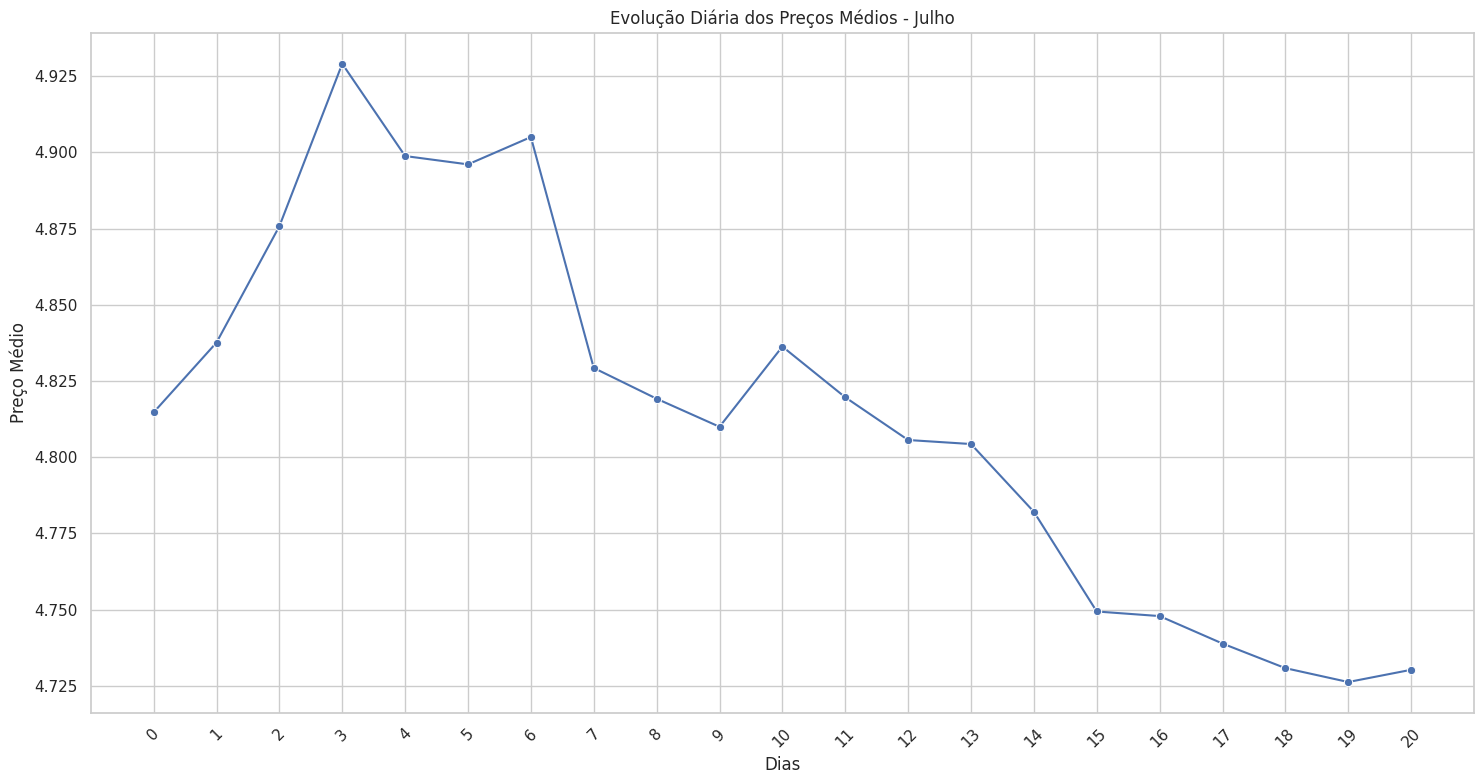

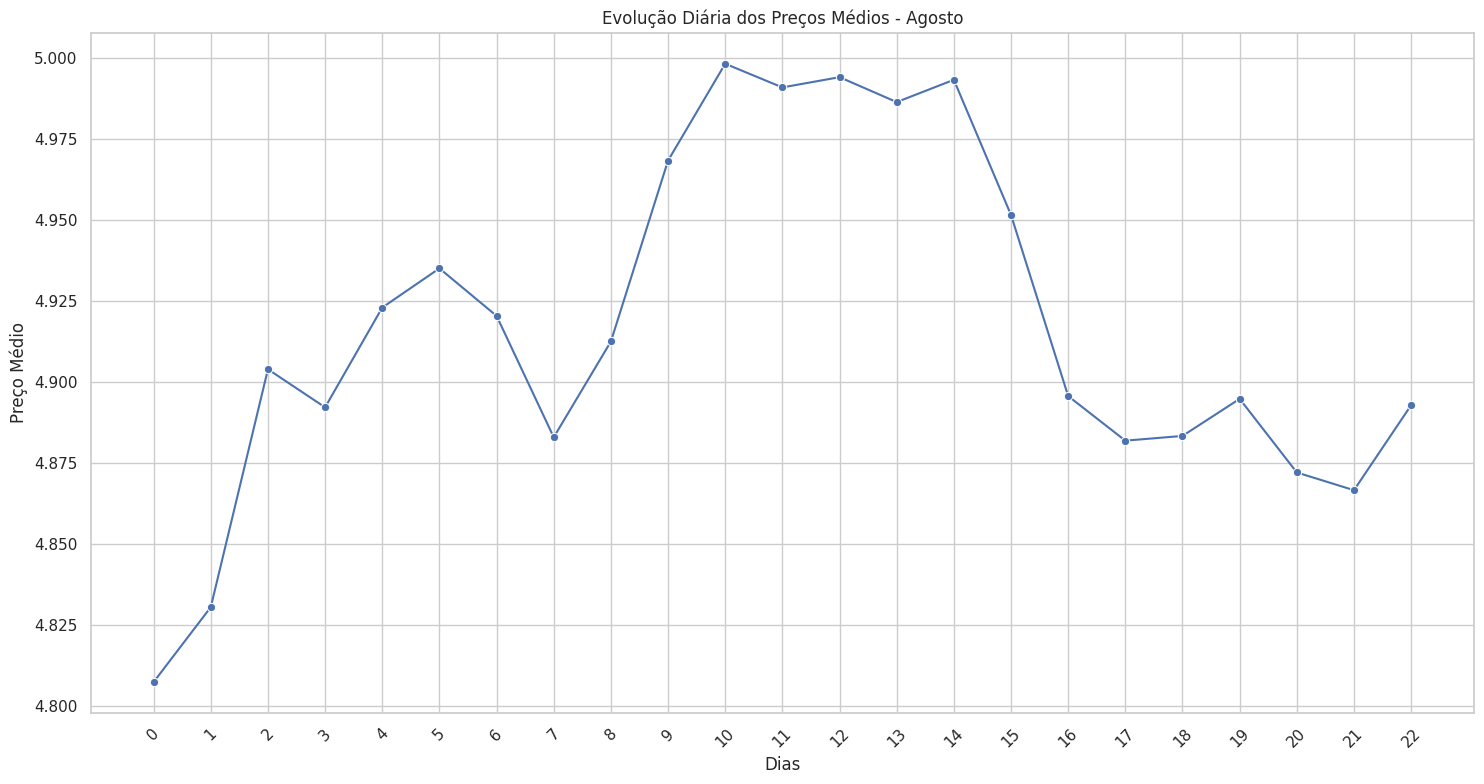

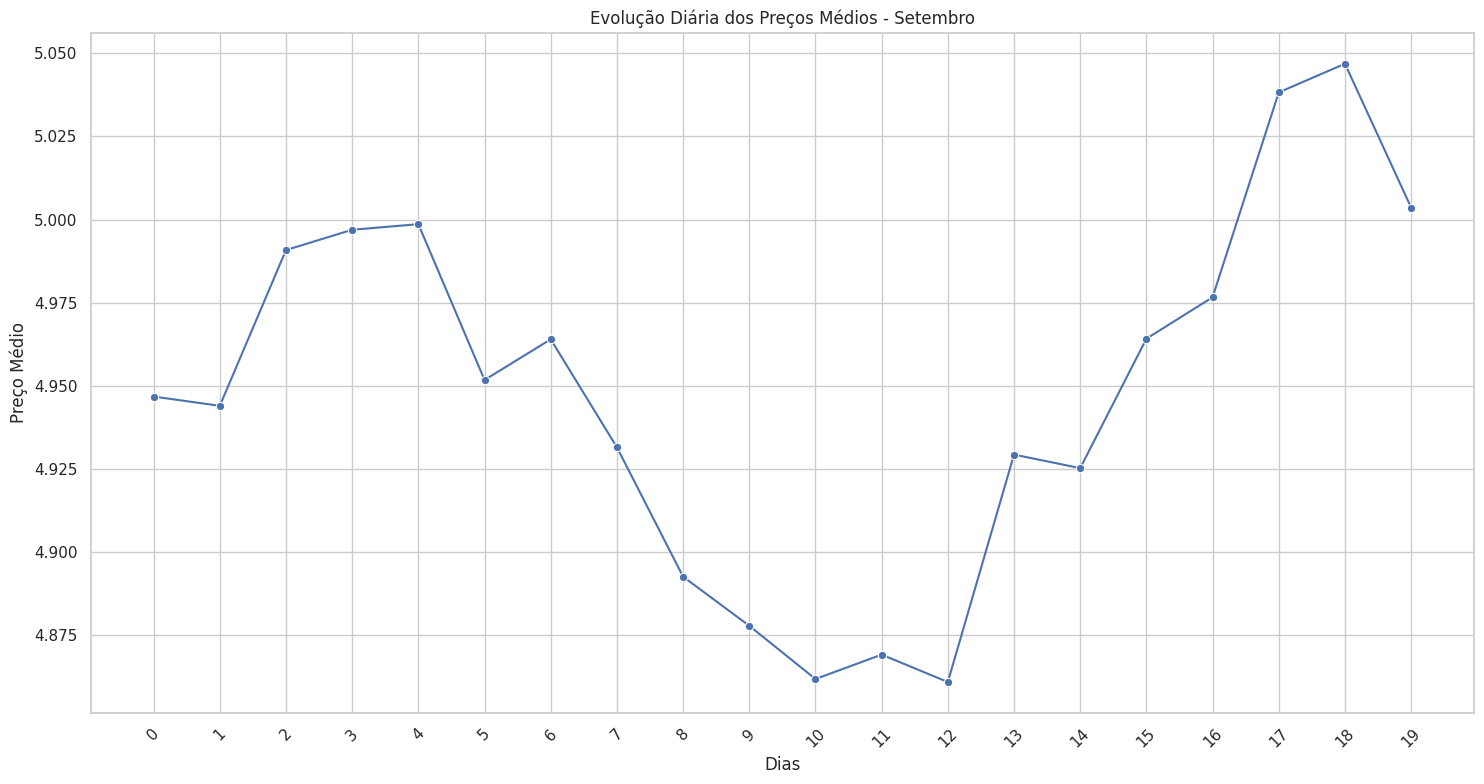

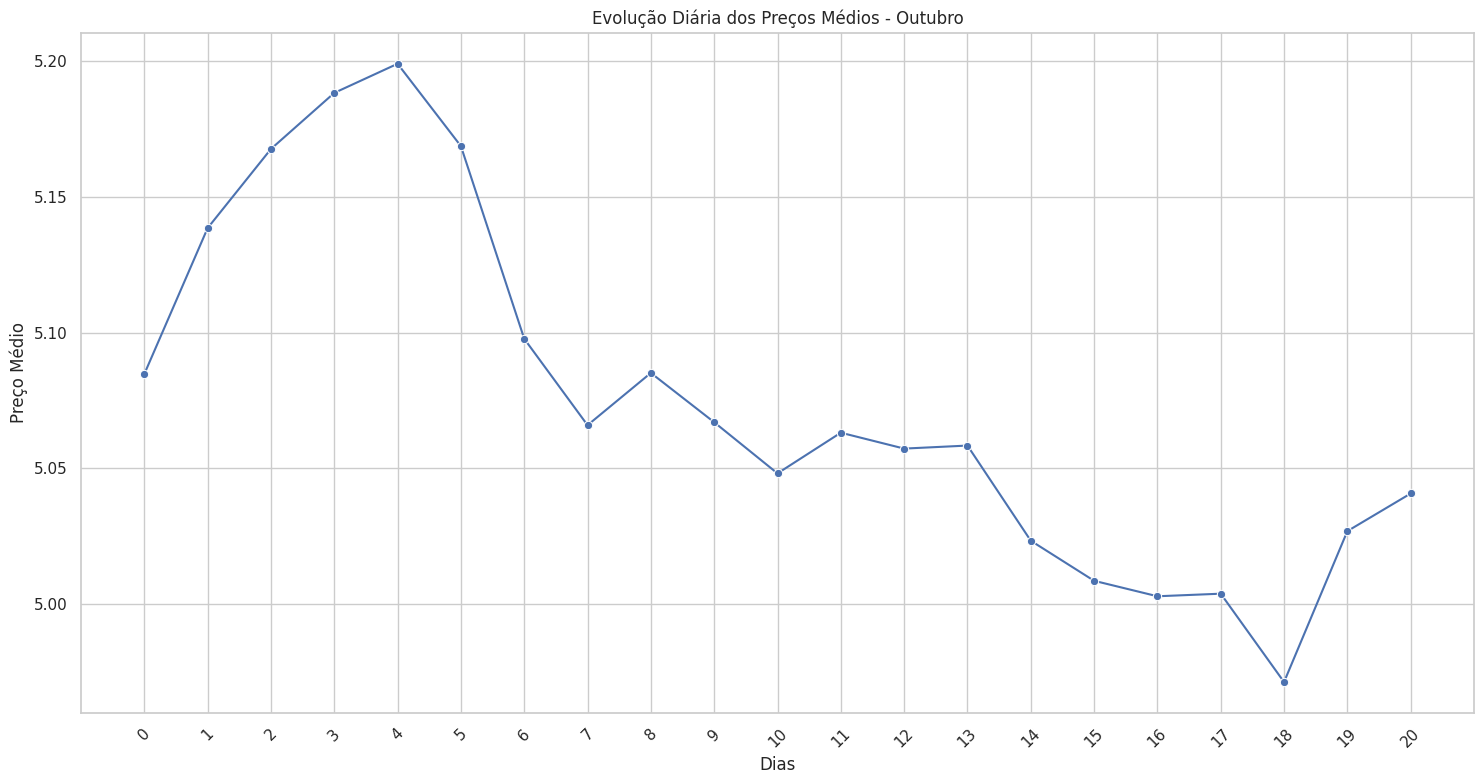

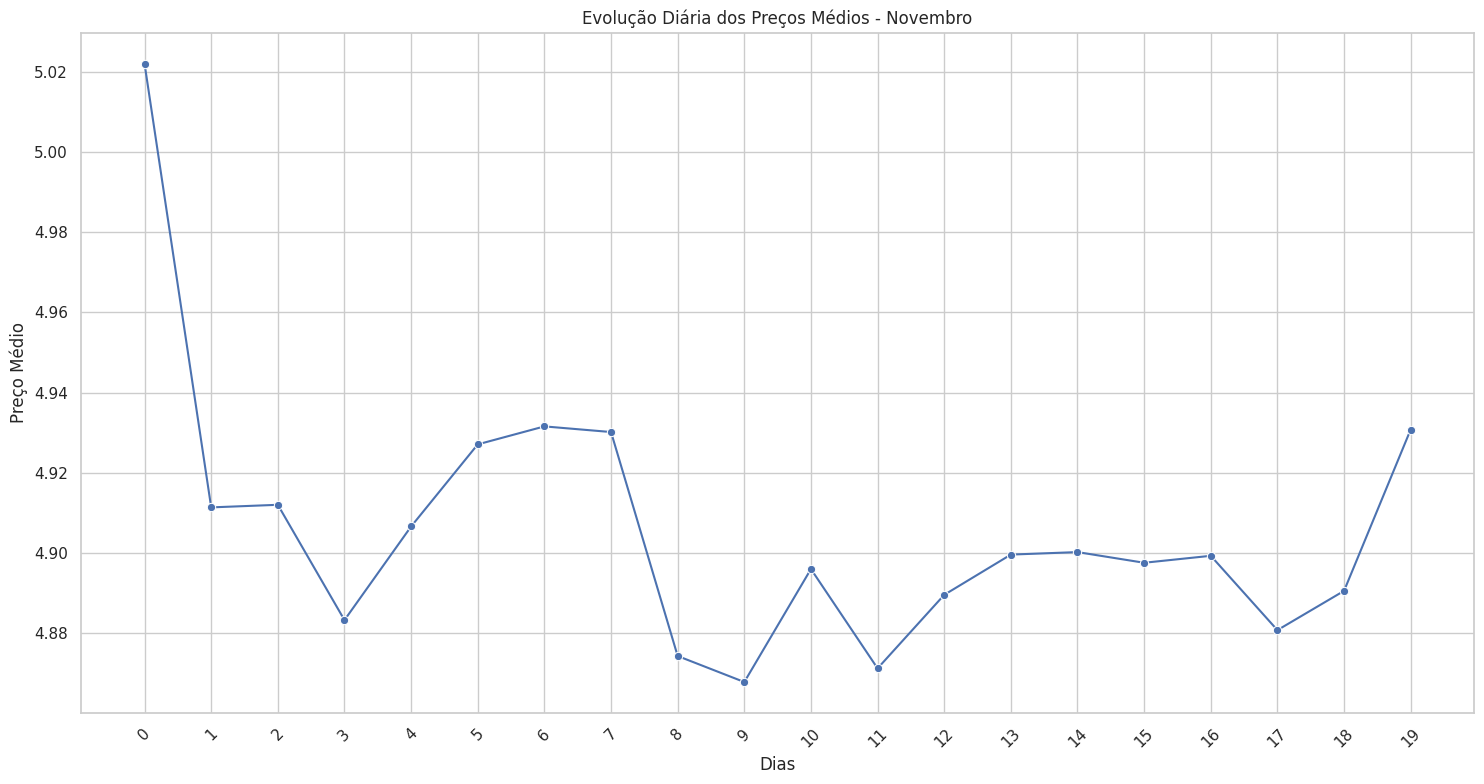

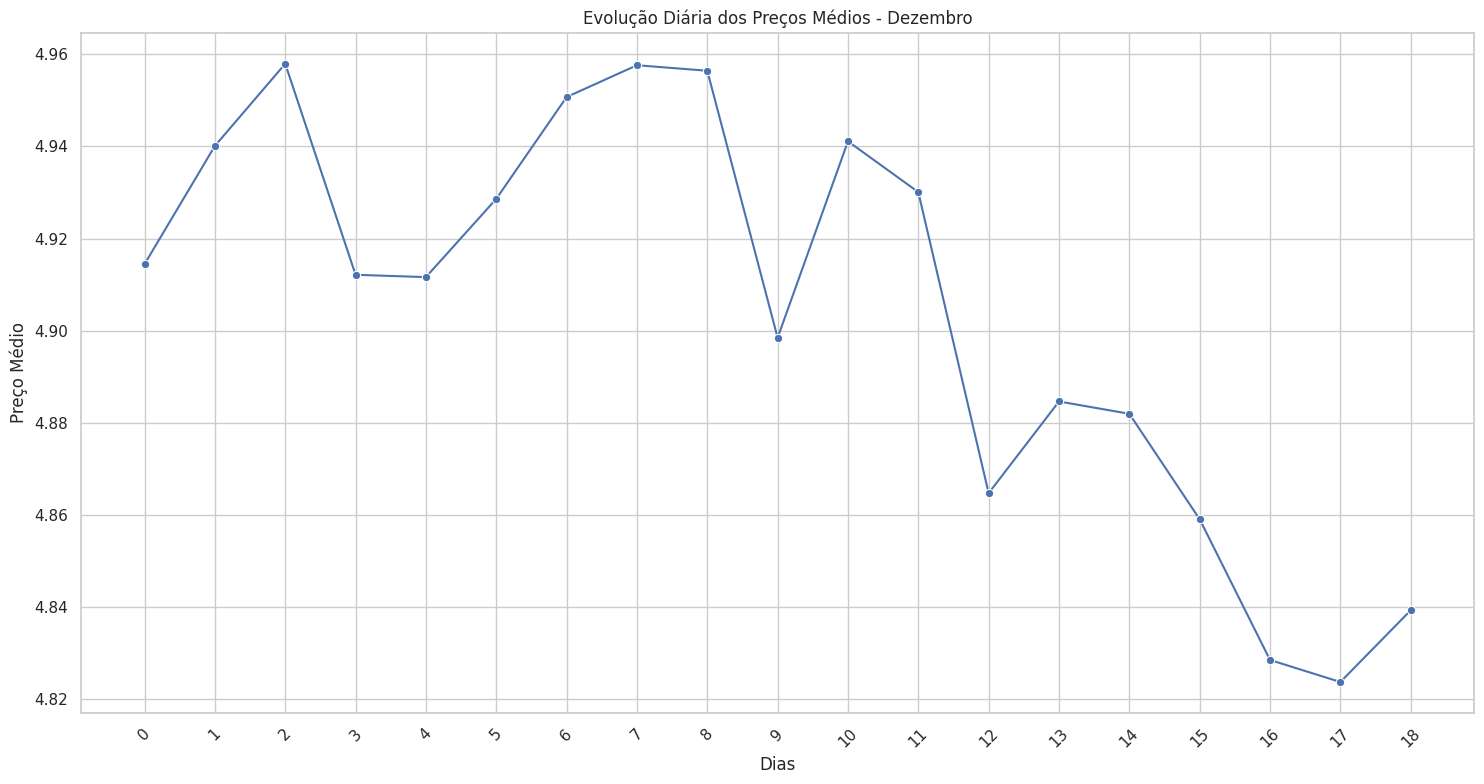

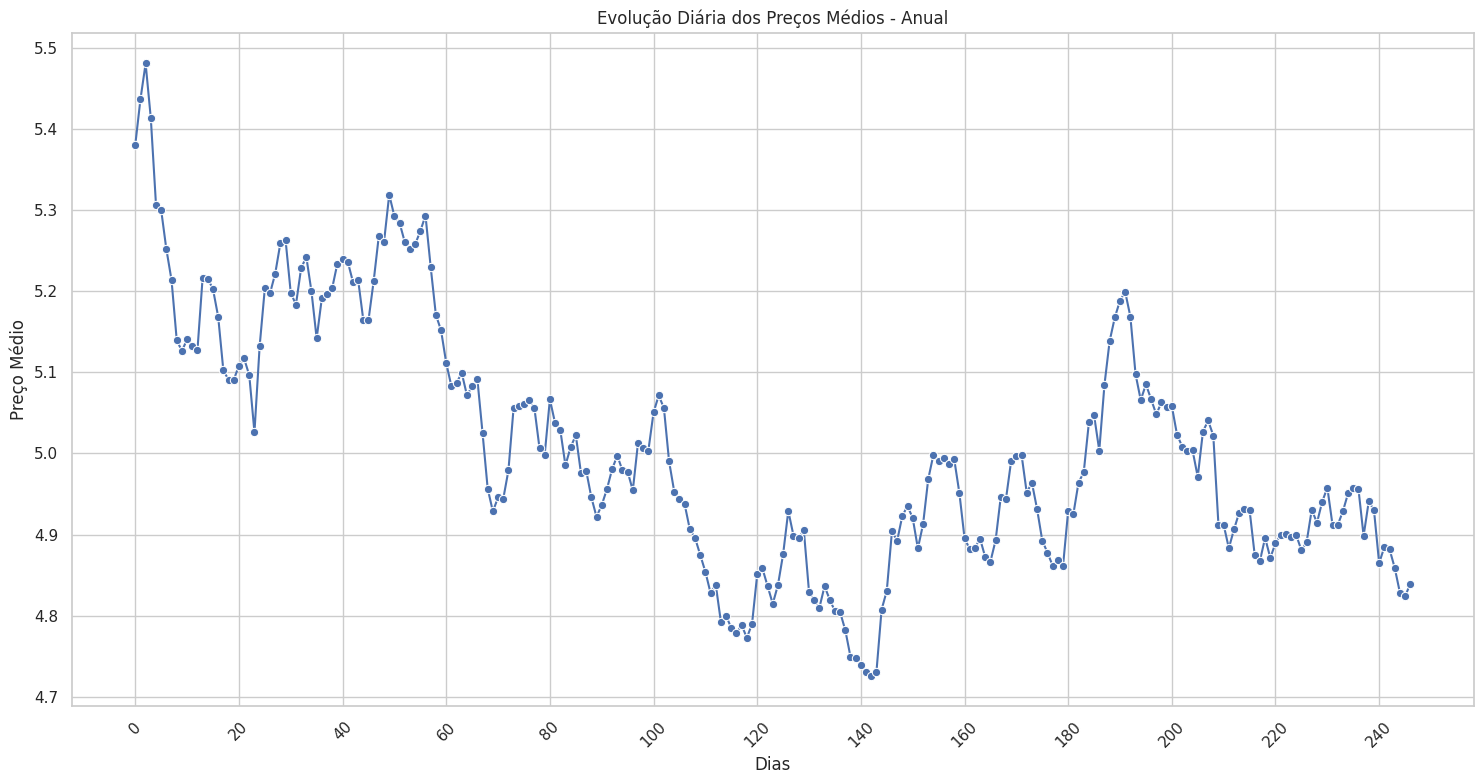

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração do estilo do seaborn
sns.set(style="whitegrid")

# Função para criar gráficos de evolução diária dos preços médios
def plot_daily_evolution(monthly_df, month_name):
    daily_prices = monthly_df.groupby(monthly_df.index)['PREÇO MÉD.'].mean()

    plt.figure(figsize=(15, 8))
    sns.lineplot(x=daily_prices.index, y=daily_prices.values, marker='o')
    plt.xlabel('Dias')
    plt.ylabel('Preço Médio')
    plt.title(f'Evolução Diária dos Preços Médios - {month_name.capitalize()}')
    plt.grid(True)
    plt.xticks(ticks=daily_prices.index, labels=daily_prices.index, rotation=45)
    plt.tight_layout()
    plt.show()

# Criar gráficos de evolução diária dos preços médios para todos os meses
for month in monthly_dfs:
    monthly_df = monthly_dfs[month]
    plot_daily_evolution(monthly_df, month)

# Criar gráfico de evolução diária dos preços médios para o ano inteiro
annual_df = pd.concat(monthly_dfs.values(), ignore_index=True)
daily_prices_annual = annual_df.groupby(annual_df.index)['PREÇO MÉD.'].mean()

plt.figure(figsize=(15, 8))
sns.lineplot(x=daily_prices_annual.index, y=daily_prices_annual.values, marker='o')
plt.xlabel('Dias')
plt.ylabel('Preço Médio')
plt.title('Evolução Diária dos Preços Médios - Anual')
plt.grid(True)

# Ajustar rótulos do eixo X para mostrar apenas alguns rótulos selecionados
step = len(daily_prices_annual) // 12  # Mostrar aproximadamente um rótulo por mês
plt.xticks(ticks=daily_prices_annual.index[::step], labels=daily_prices_annual.index[::step], rotation=45)

plt.tight_layout()
plt.show()

### Análise dos Dados de Preços Médios Diários
A análise dos gráficos de evolução diária dos preços médios de contratos futuros de dólar ao longo de 2023 revela várias tendências e flutuações significativas:

- Janeiro: Observa-se uma tendência de queda nos preços médios ao longo do mês, com um pico no início.
- Fevereiro: Houve flutuações significativas nos preços médios, indicando uma volatilidade elevada.
- Março: Os preços médios começaram baixos, aumentaram para um pico no meio do mês e depois caíram novamente.
- Abril a Junho: Esses meses mostram uma queda gradual nos preços médios, com alguns picos intermediários.
- Julho: Apresenta uma tendência de alta no início, seguida por uma queda acentuada e nova recuperação.
- Agosto a Outubro: Apresentam volatilidade significativa, com flutuações marcantes nos preços médios.
- Novembro: Inicialmente, os preços caíram, seguidos por uma recuperação no final do mês.
- Dezembro: O mês começou com uma tendência de alta e terminou com uma queda.
- Anual: O gráfico anual mostra uma alta volatilidade com várias flutuações significativas ao longo do ano.

### Conclusão
A análise detalhada dos preços médios diários ao longo de 2023 permite identificar padrões de volatilidade e tendências sazonais nos preços dos contratos futuros de dólar. A visualização clara e detalhada das flutuações ao longo do ano fornece insights valiosos para traders e analistas financeiros.